# One-Dte Strategy 

Author: Laurent Lanteigne
Date: 2025-05-22

## Imports

In [1]:
import polars as pl
import datetime

from one_dte_trade.data import (
    OneDTEDataPipeline,
)
from one_dte_trade.strategy_signal import (
    SignalGenerator,
)
from one_dte_trade.backtester import (
    Backtester,
)
from one_dte_trade.analysis import (
    Analyzer,
)

Initializing package and loading configurations...
MockCatLoader initialized. Will use cached Parquet files.
Configurations loaded successfully from /home/laurent/git_projects/trading_strategies/one_dte_trade/src/one_dte_trade/configs/project_settings.json
Package initialization complete. Config objects are now available.


In [2]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)
warnings.filterwarnings('ignore', category=pl.exceptions.PerformanceWarning)
pl.Config.set_tbl_rows(30)
pl.Config.set_tbl_cols(30)

polars.config.Config

### Loading Classes

In [3]:
pipeline = OneDTEDataPipeline()
signal = SignalGenerator()
backtester = Backtester()
analyzer = Analyzer()

OneDTEDataPipeline: Initializing with pre-loaded configurations...
StraddleDataPipeline initialized with TICKER_ID: 108105
VolatilityIndicesFetcher initialized.
FeatureBuilder initialized with VOL_EWMA: 5, ZSCORE_TIME: 252
OneDTEDataPipeline: Components initialized.
SignalGenerator initialized with LAGS: (1, 2, 3), WEIGHTS: (0.6, 0.3, 0.1)
Backtester initialized with CAPITAL: 1,000,000, WEIGHT_PER_TRADE: 0.05
Analyzer initialized with plot style from config: whitegrid


### Generating Backtest

In [4]:
%%capture --no-display
df = pipeline.get_1dte_data(generate_features=True)
df = signal.generate_signals(input_df=df)
df = backtester.generate_backtest_results(df)

2025-05-23 10:40:06,317 - root - INFO - Calling get_1dte_data(<one_dte_trade.data.OneDTEDataPipeline object at 0x7f0a96d3e2f0>, generate_features=True)
2025-05-23 10:40:06,319 - root - INFO - Calling get_open_straddle_data(<one_dte_trade.straddle_data.StraddleDataPipeline object at 0x7f0a3e4b7d60>)
2025-05-23 10:40:10,575 - root - INFO - 'get_open_straddle_data' returned DataFrame with shape (1194, 8)
2025-05-23 10:40:10,576 - root - INFO - Calling get_close_straddle_data(<one_dte_trade.straddle_data.StraddleDataPipeline object at 0x7f0a3e4b7d60>)
2025-05-23 10:40:11,341 - root - INFO - 'get_close_straddle_data' returned DataFrame with shape (255138, 7)
2025-05-23 10:40:11,343 - root - INFO - Calling merge_open_trade_close_trade(<one_dte_trade.straddle_data.StraddleDataPipeline object at 0x7f0a3e4b7d60>, arg1(DataFrame shape=(1194, 8)), arg2(DataFrame shape=(255138, 7)))
2025-05-23 10:40:11,355 - root - INFO - 'merge_open_trade_close_trade' returned DataFrame with shape (1188, 9)
2025-

In [22]:
df.head()

date,okey_xx,uprc_day_0,expiration,dist_to_strike,uprc_day_1,sprc_day_0_C,sprc_day_0_P,sprc_day_1_C,sprc_day_1_P,straddle_day_0,straddle_day_1,uprc_diff,VIX,VVIX,…,ret_sprc_lag_2_0.3,ret_sprc_lag_3_0.1,ret_uprc_lag_1_0.6,ret_uprc_lag_2_0.3,ret_uprc_lag_3_0.1,ret_sprc_signal,ret_uprc_signal,ret_sprc_signal_capital,ret_uprc_signal_capital,ret_sprc_signal_pos,ret_uprc_signal_pos,ret_sprc_signal_pnl,ret_uprc_signal_pnl,ret_sprc_signal_cum_pnl,ret_uprc_signal_cum_pnl
date,f64,f32,date,f32,f32,f32,f32,f32,f32,f32,f32,f64,f32,f32,…,f32,f32,f64,f64,f64,f32,f64,f32,f64,f32,f64,f32,f64,f32,f64
2023-01-06,3895.0,3895.080078,2023-01-09,0.080078,3892.090088,15.4,17.599998,0.225,1.9,33.0,2.125,2.909912,21.950001,73.789993,…,-0.1363,0.040403,-0.360452,-0.135603,0.031614,-0.440488,-0.464441,-22024.380859,-23222.070373,-667.405457,-703.699102,20606.142578,21174.367834,20606.142578,21174.367834
2023-01-09,3890.0,3892.090088,2023-01-10,2.090088,3919.25,19.450001,15.75,29.049999,0.025,35.200001,29.074999,29.25,21.625,76.0,…,-0.172295,-0.045433,0.547093,-0.180226,-0.045201,0.343635,0.321665,17181.740234,16083.269074,488.117615,456.911043,-2989.721436,-2718.621056,17616.421875,18455.746777
2023-01-10,3920.0,3919.25,2023-01-11,0.75,3969.610107,13.950001,14.6,46.75,0.025,28.550001,46.775002,49.610107,21.52,76.800003,…,0.280682,-0.057432,0.10142,0.273546,-0.060075,0.327653,0.314891,16382.673828,15744.56589,573.823914,551.473389,10457.941406,11614.088184,28074.363281,30069.834961
2023-01-11,3970.0,3969.610107,2023-01-12,0.389893,3983.169922,38.449997,40.300003,13.5,0.025,78.75,13.525,13.169922,20.935001,77.964996,…,0.052202,0.093561,-0.442594,0.05071,0.091182,-0.23725,-0.300702,-11862.49707,-15035.092126,-150.634888,-190.921805,9825.160156,12520.666873,37899.523438,42590.501834
2023-01-12,3985.0,3983.169922,2023-01-13,1.830078,3999.090088,15.700001,16.85,15.1,0.025,32.550003,15.125,14.090088,20.314999,77.889999,…,-0.191506,0.017401,0.499658,-0.221297,0.016903,0.322847,0.295264,16142.341797,14763.203456,495.924438,453.554595,-8641.484375,-8372.579347,29258.039062,34217.922487


# Strategy Perfomance
## Cumulative PnL from 2023 - Present

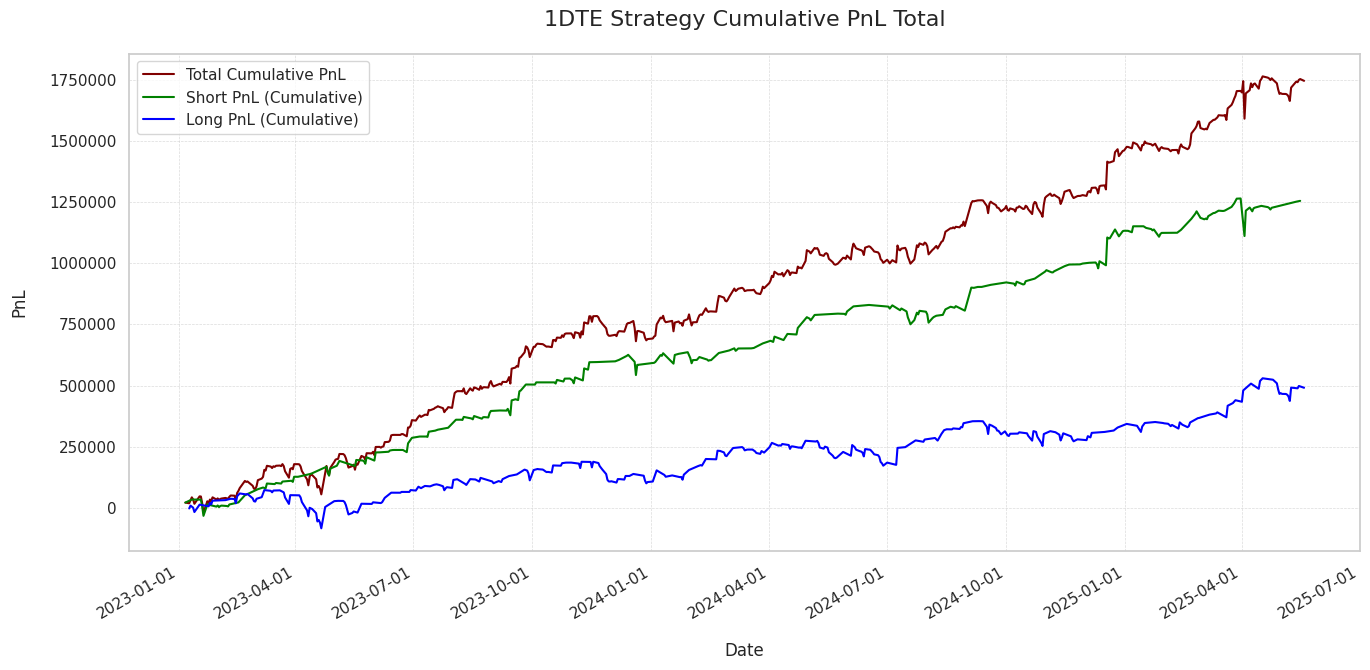

In [6]:
analyzer.plot_timeseries(df, time_col='date', value_col='ret_uprc_signal_cum_pnl', title='1DTE Strategy Cumulative PnL Total', ylabel='PnL')

## Cumulative PnL by Years 

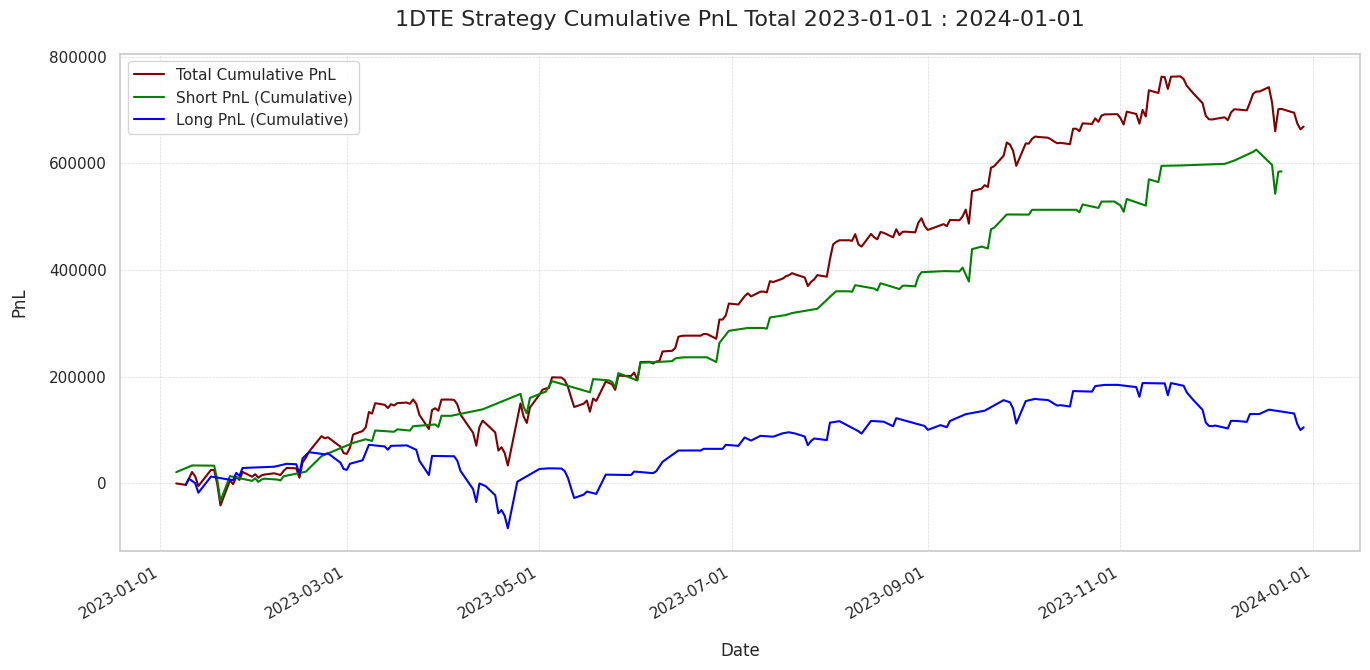

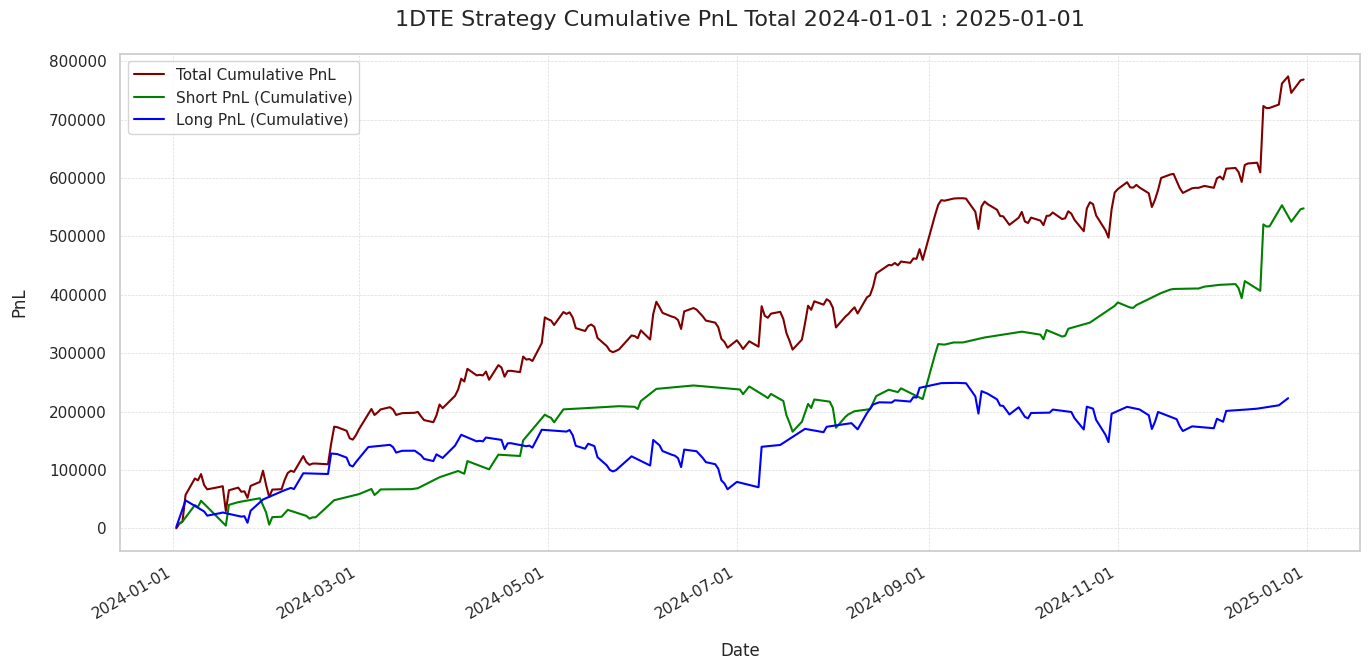

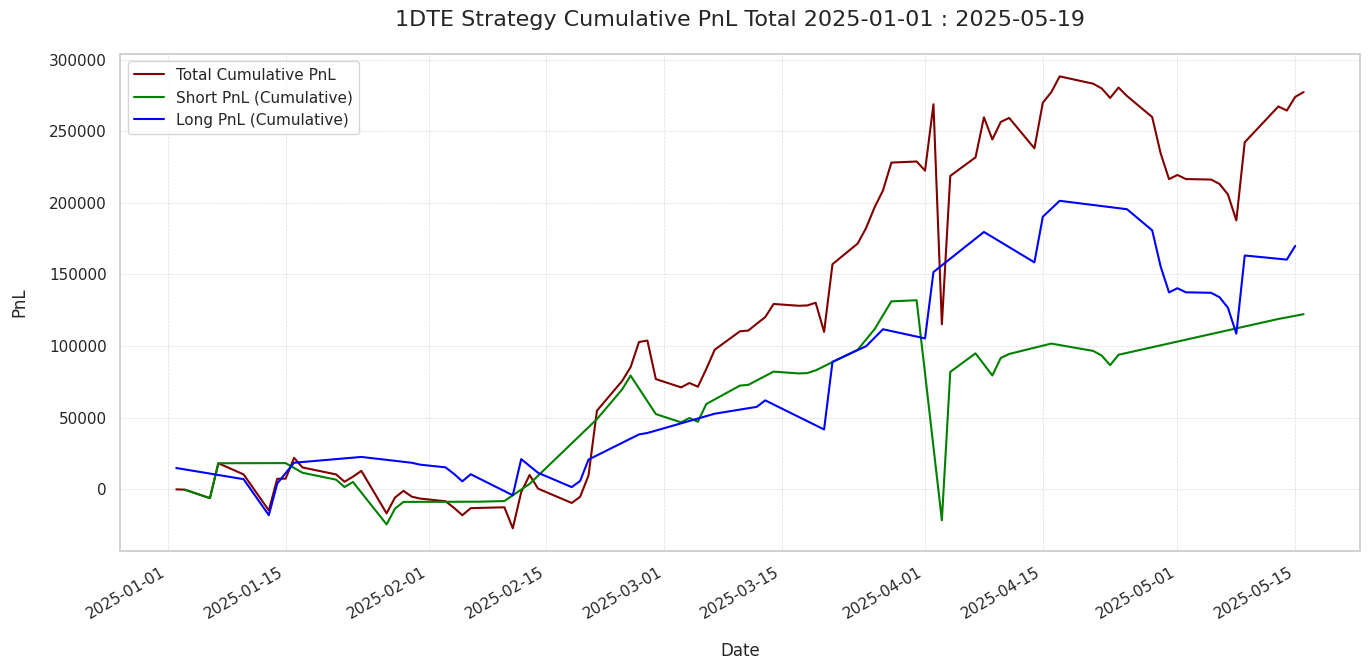

In [7]:
dates = [datetime.date(2023,1,1), datetime.date(2024,1,1), datetime.date(2025,1,1), datetime.date(2026,1,1)]
for i in range(1, len(dates)):
    start_date = dates[i-1]
    end_date = min(dates[i], df.get_column('date').last())
    tmp = df.filter(
        pl.col("date").is_between(start_date, end_date, closed="left")
    )
    tmp = tmp.with_columns(pl.col('ret_uprc_signal_cum_pnl') - pl.col('ret_uprc_signal_cum_pnl').first())
    title = f'1DTE Strategy Cumulative PnL Total {start_date.strftime("%Y-%m-%d")} : {end_date.strftime("%Y-%m-%d")}'
    analyzer.plot_timeseries(tmp, time_col='date', value_col='ret_uprc_signal_cum_pnl', title=title, ylabel='PnL')

## PnL Statistics Long and Short 

In [8]:
analyzer.calculate_pnl_statistics(df=df, pnl_col_name='ret_uprc_signal_pnl')

Statistic,Value
str,f64
"""Mean Daily PnL""",2954.414419
"""Std Dev Daily PnL""",18561.202942
"""Annualized Sharpe Ratio""",2.526769
"""Win Rate (%)""",53.299492
"""Max Daily Win""",113748.01533
"""Max Daily Loss""",-153567.370679
"""Worst 5-Day Cum PnL (% of 1,00…",-9.34043
"""Worst 20-Day Cum PnL (% of 1,0…",-11.544972
"""Skewness""",0.174852


## PnL Statistics Short

In [9]:
tmp = df.filter(pl.col('ret_uprc_signal_pos') < 0)
analyzer.calculate_pnl_statistics(df=tmp, pnl_col_name='ret_uprc_signal_pnl')

Statistic,Value
str,f64
"""Mean Daily PnL""",4736.631058
"""Std Dev Daily PnL""",20908.96271
"""Annualized Sharpe Ratio""",3.596146
"""Win Rate (%)""",63.773585
"""Max Daily Win""",113748.01533
"""Max Daily Loss""",-153567.370679
"""Worst 5-Day Cum PnL (% of 1,00…",-10.460052
"""Worst 20-Day Cum PnL (% of 1,0…",-4.411138
"""Skewness""",-0.538515


## PnL Statistics Long

In [10]:
tmp = df.filter(pl.col('ret_uprc_signal_pos') > 0)
analyzer.calculate_pnl_statistics(df=tmp, pnl_col_name='ret_uprc_signal_pnl')

Statistic,Value
str,f64
"""Mean Daily PnL""",1505.680035
"""Std Dev Daily PnL""",16297.528482
"""Annualized Sharpe Ratio""",1.466598
"""Win Rate (%)""",44.785276
"""Max Daily Win""",87314.342828
"""Max Daily Loss""",-34288.004391
"""Worst 5-Day Cum PnL (% of 1,00…",-8.646096
"""Worst 20-Day Cum PnL (% of 1,0…",-15.642032
"""Skewness""",1.220068


# Signal Analysis 
## Autocorrelation of Straddle Returns 

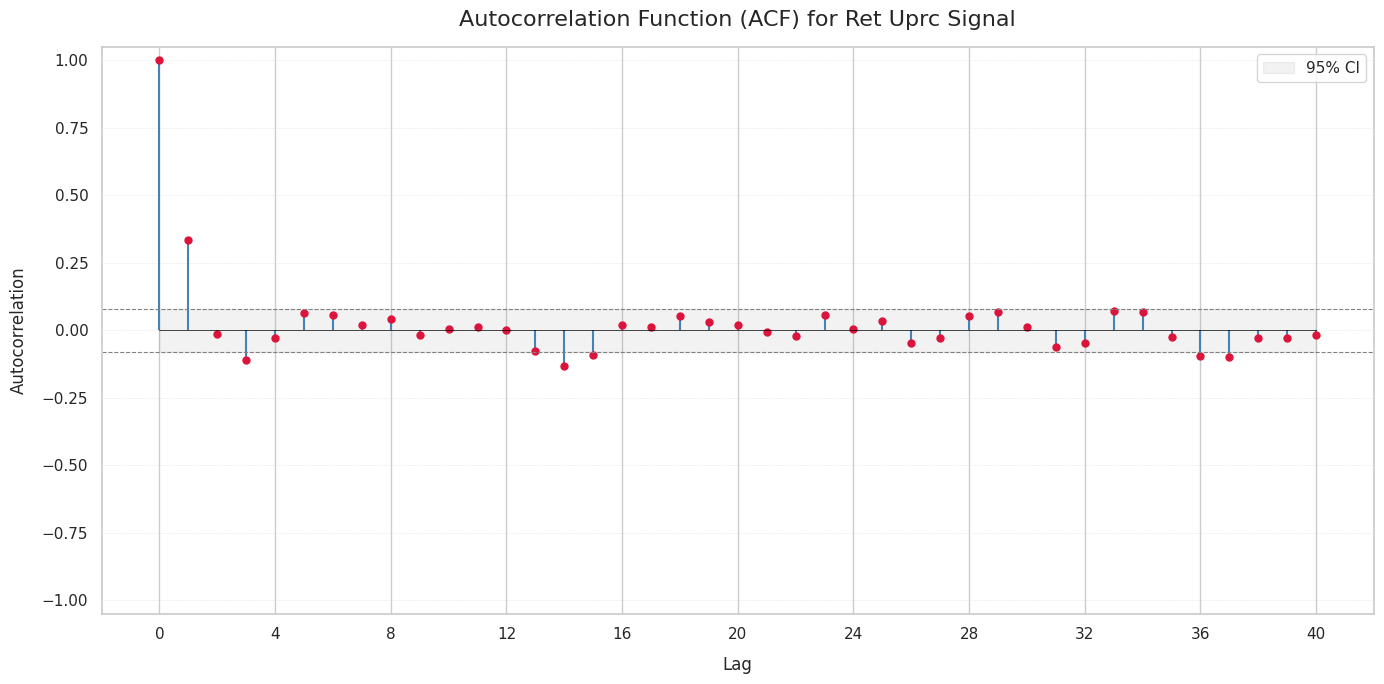

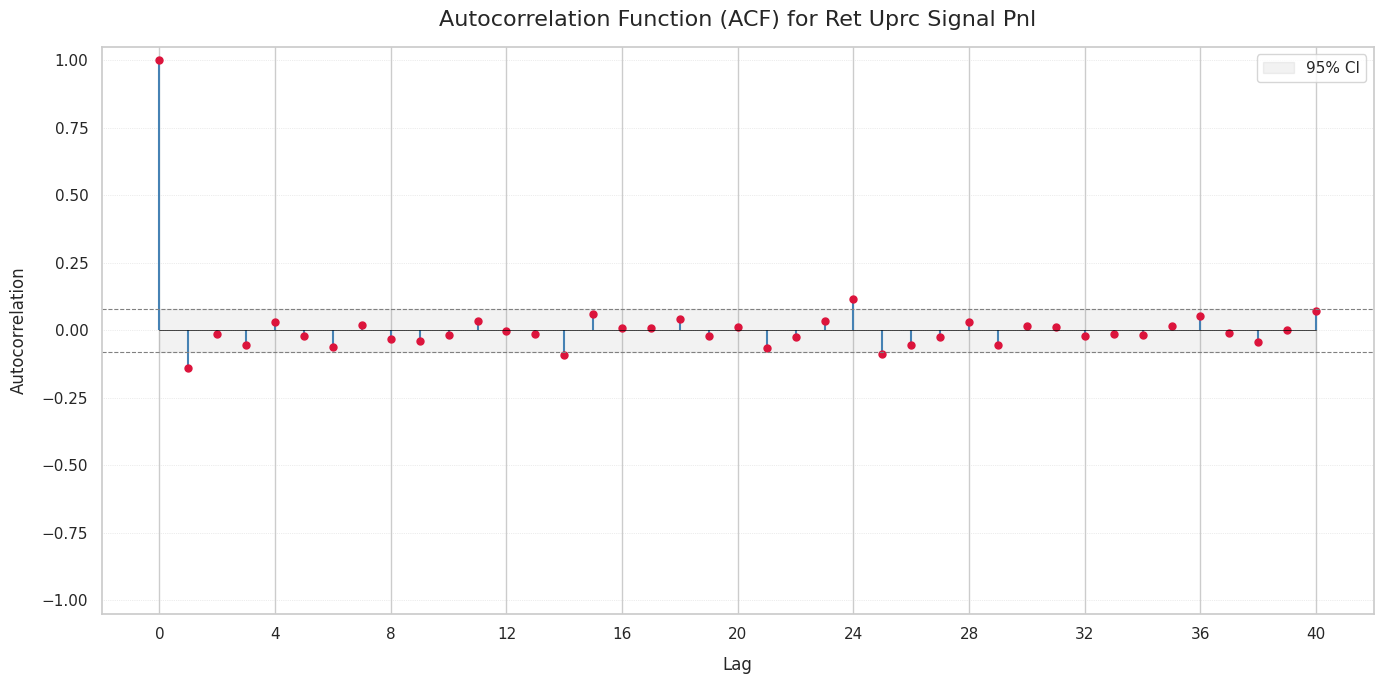

In [11]:
analyzer.plot_signal_autocorrelation(df=df, signal_cols_to_analyze=['ret_uprc_signal', 'ret_uprc_signal_pnl'])

## Daily Signal PnL Distribution

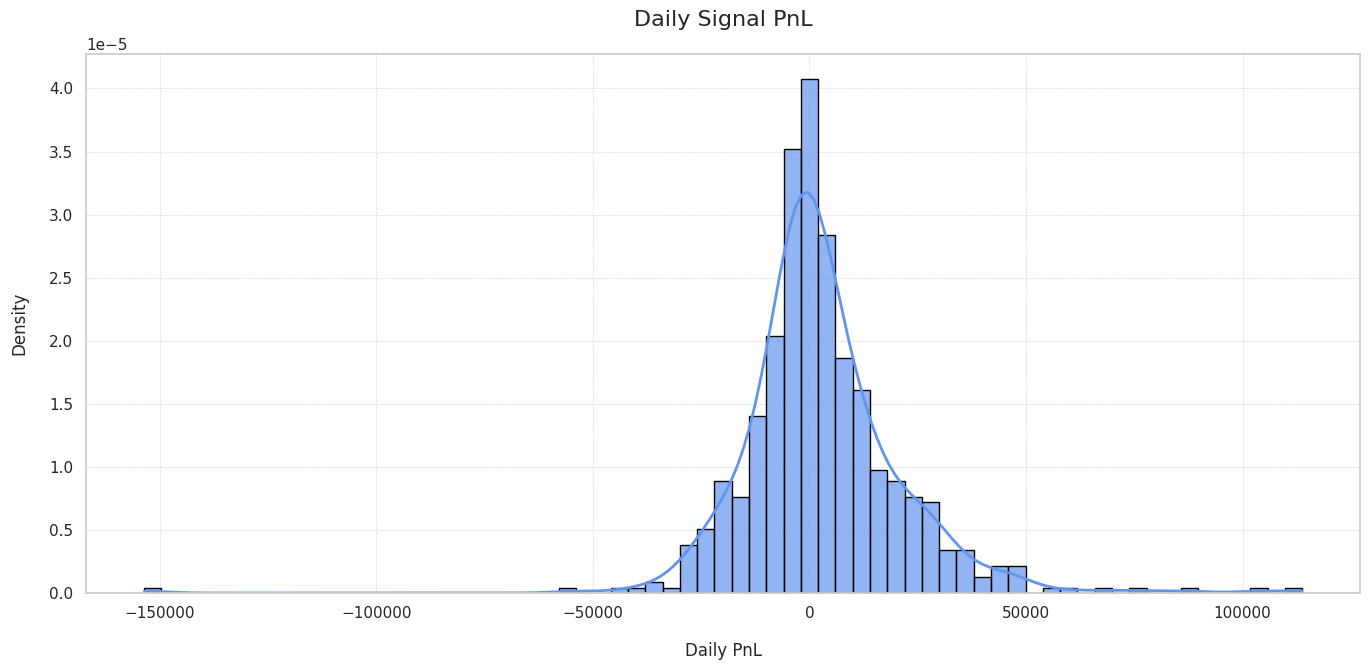

In [12]:
analyzer.plot_histogram_kde(df=df, value_col="ret_uprc_signal_pnl", title="Daily Signal PnL", xlabel="Daily PnL")

## Daily Signal Distribution

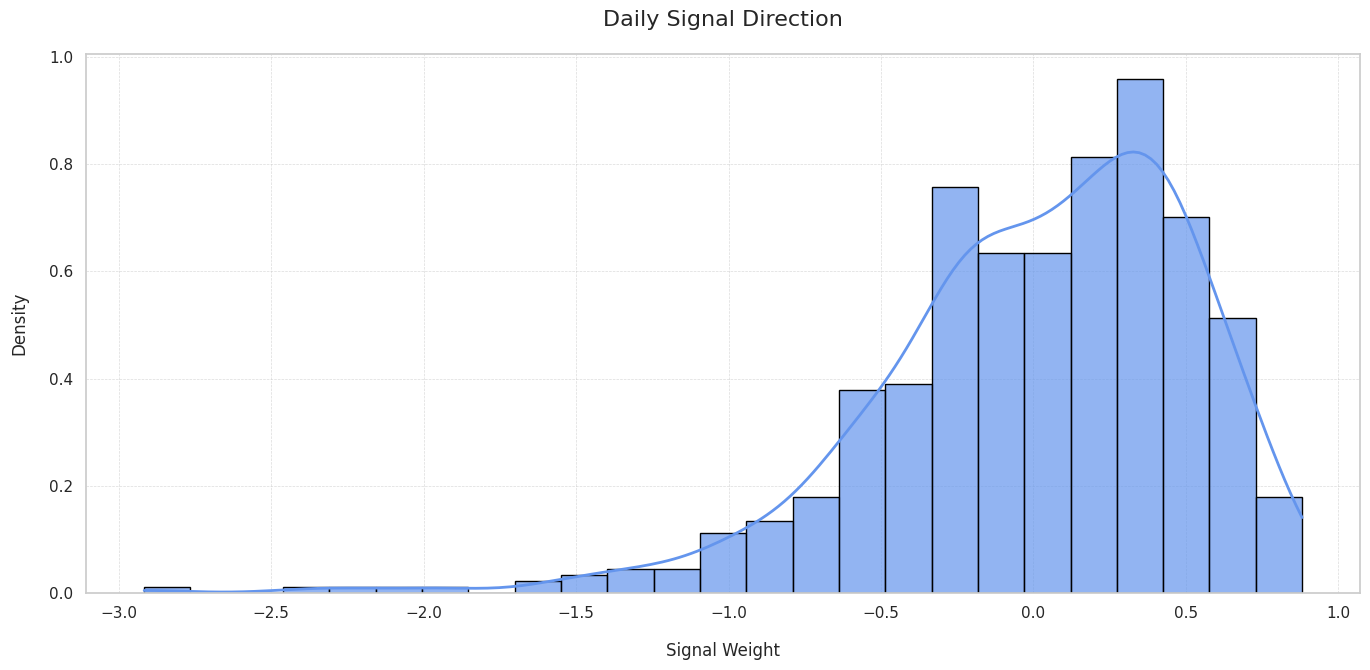

In [13]:
analyzer.plot_histogram_kde(df=df, value_col="ret_uprc_signal", title="Daily Signal Direction", xlabel="Signal Weight")

## Daily Signal PnL Timeseries

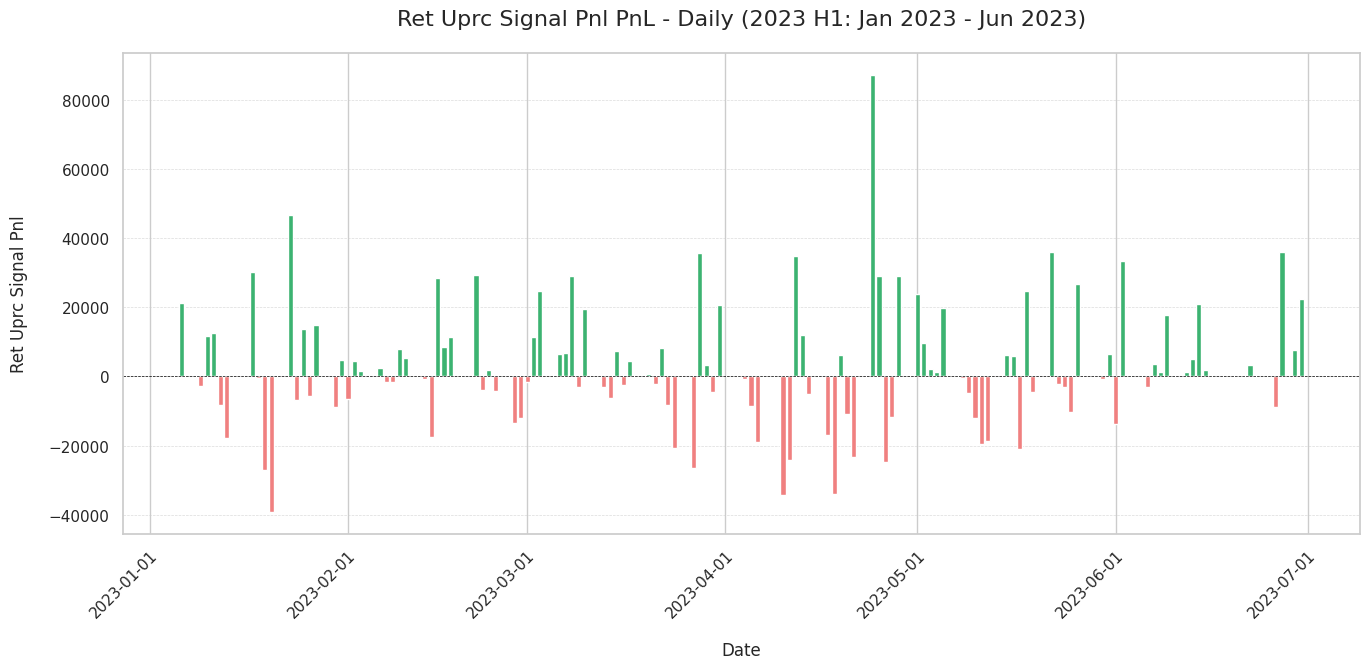

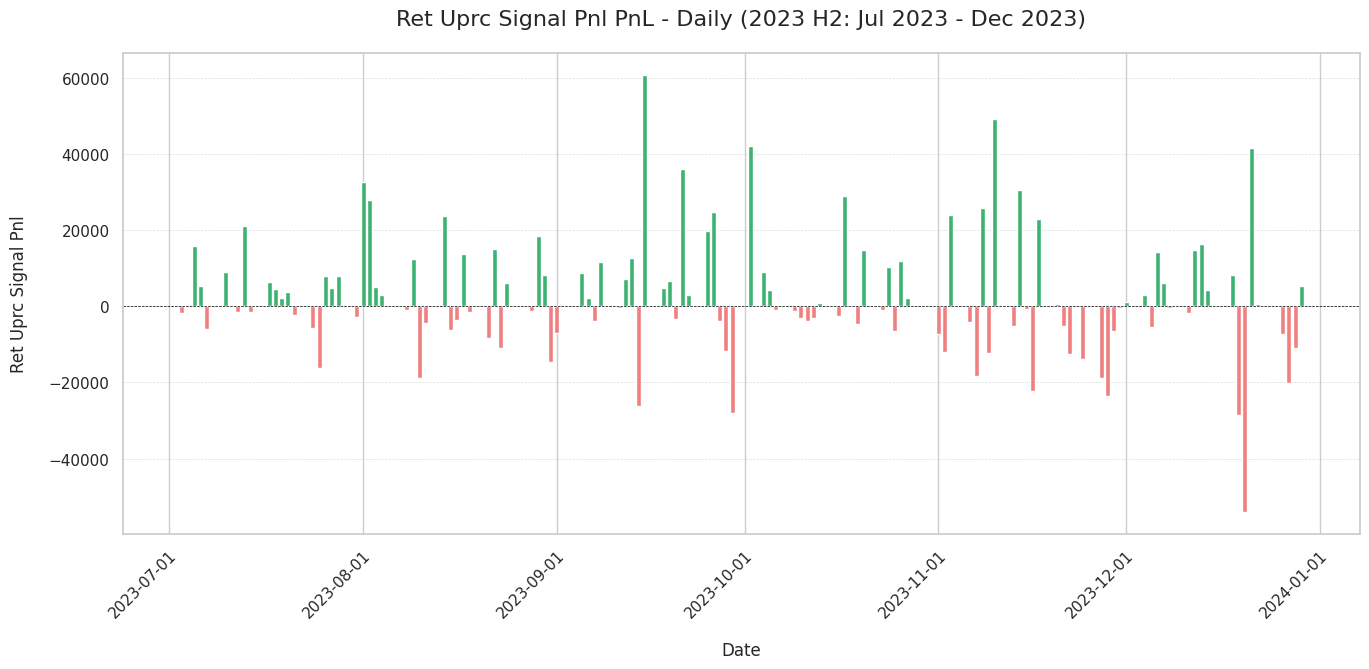

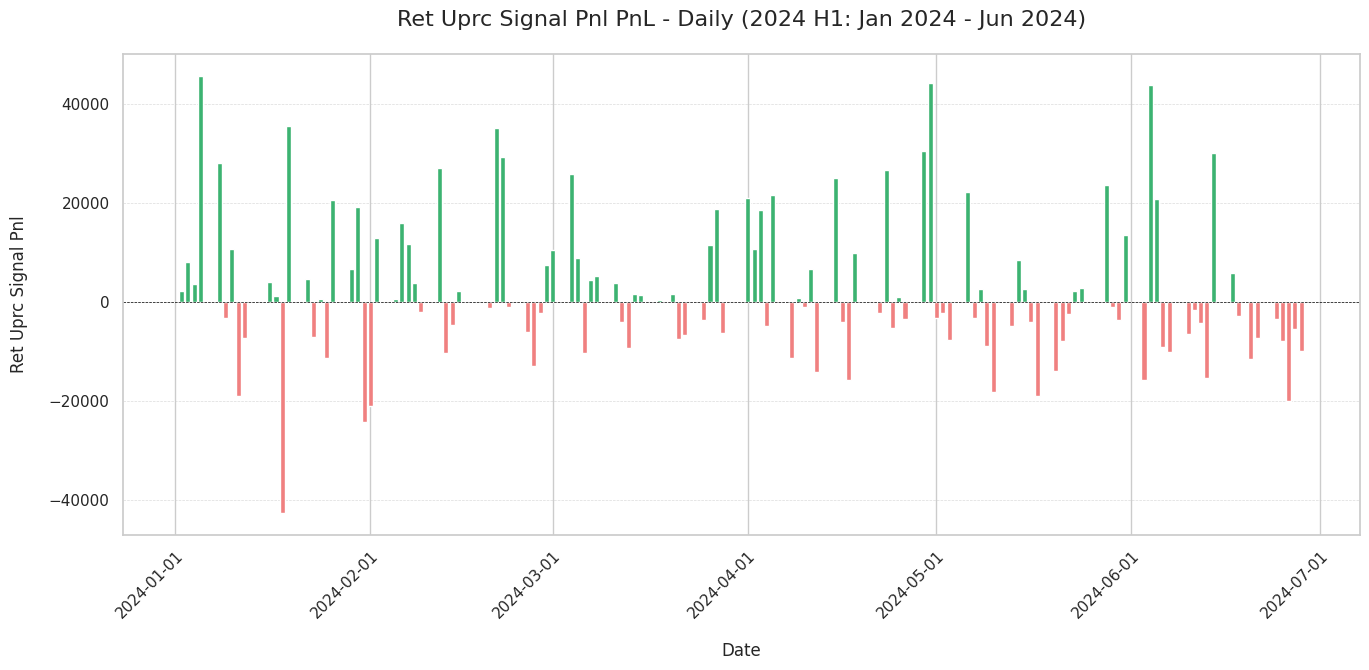

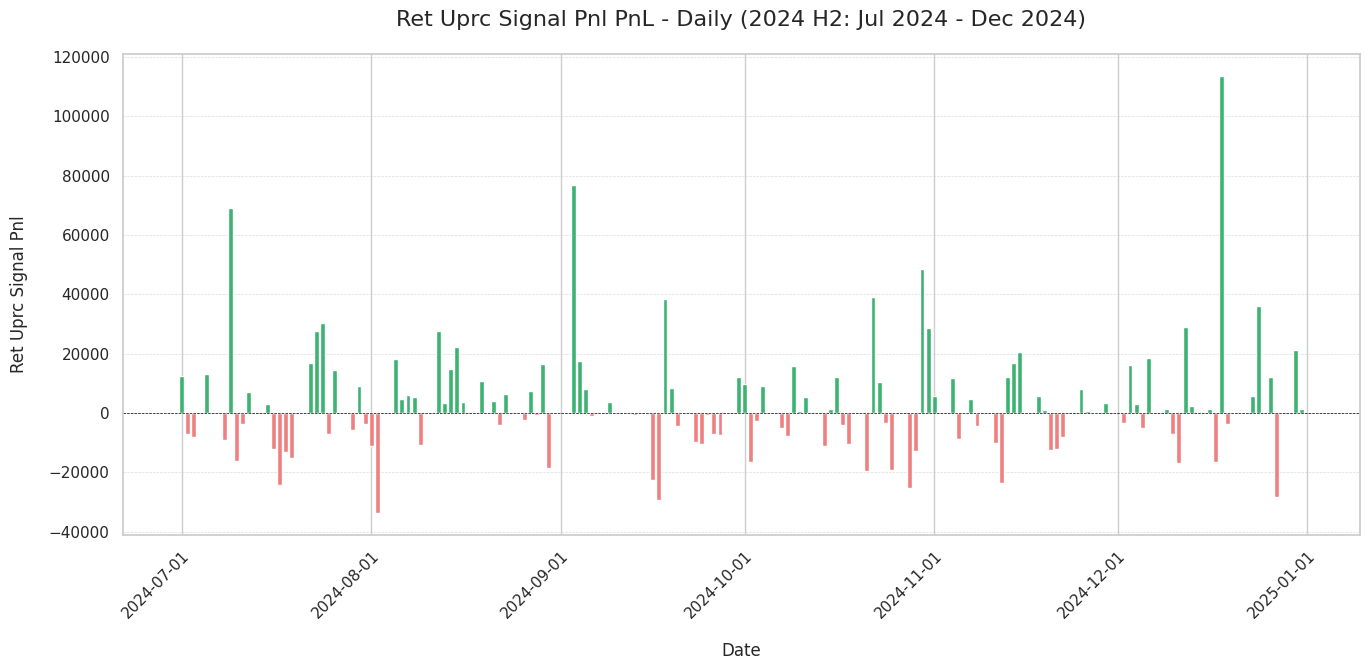

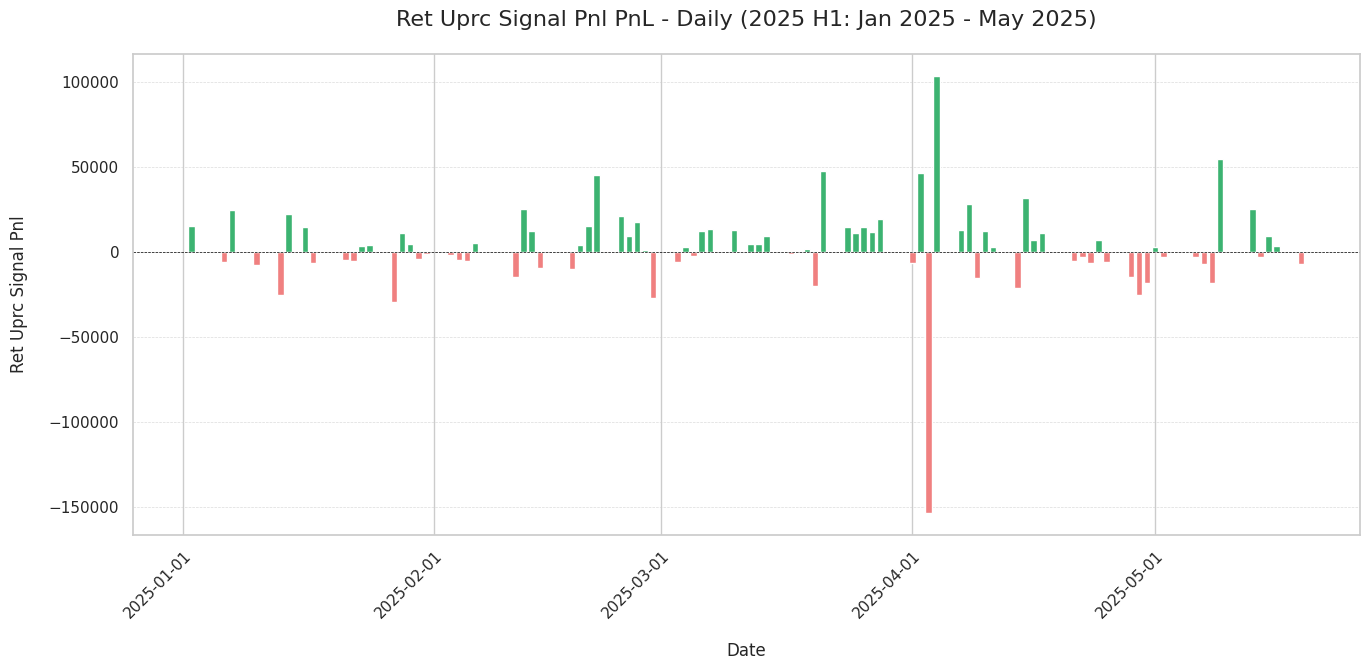

In [14]:
analyzer.plot_pnl_bars(df=df, date_col='date', pnl_col='ret_uprc_signal_pnl')

## Weekly Signal PnL Timeseries

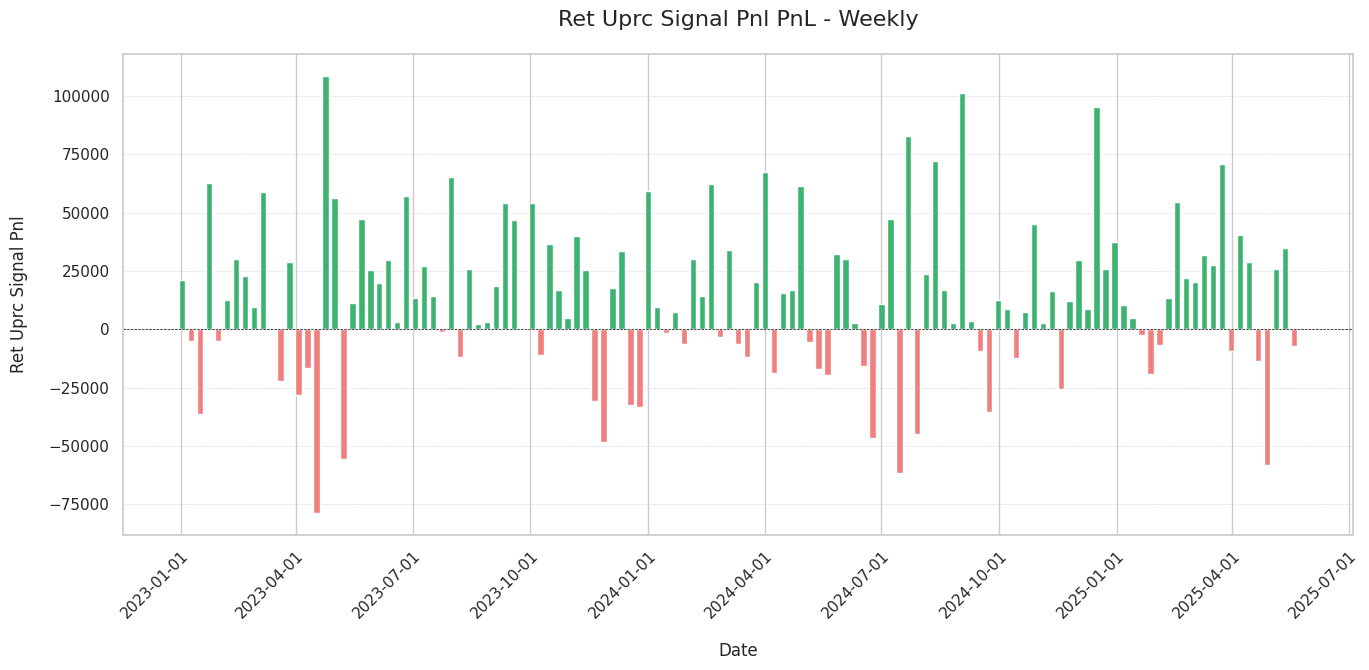

In [15]:
analyzer.plot_pnl_bars(df=df, date_col='date', pnl_col='ret_uprc_signal_pnl', aggregation_period="weekly")

# Regime Analysis
## Strategy Sharpe Ratio by Decile of Signal

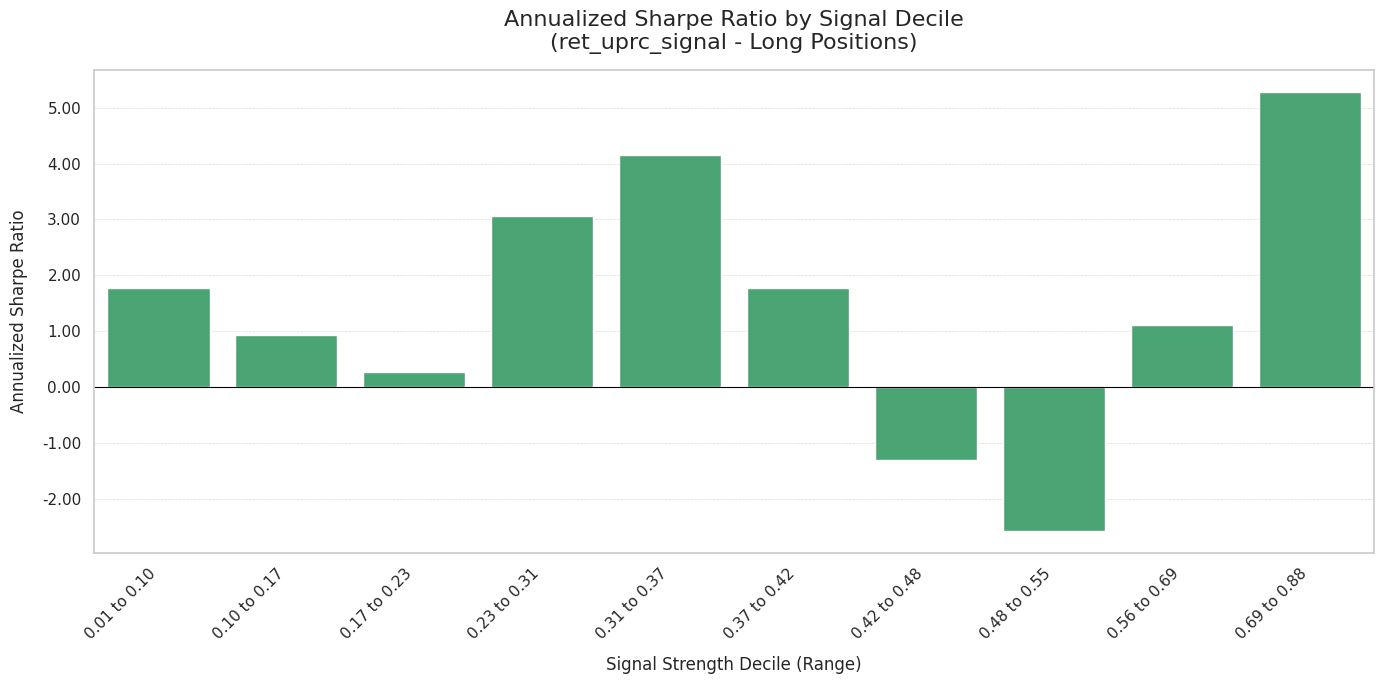

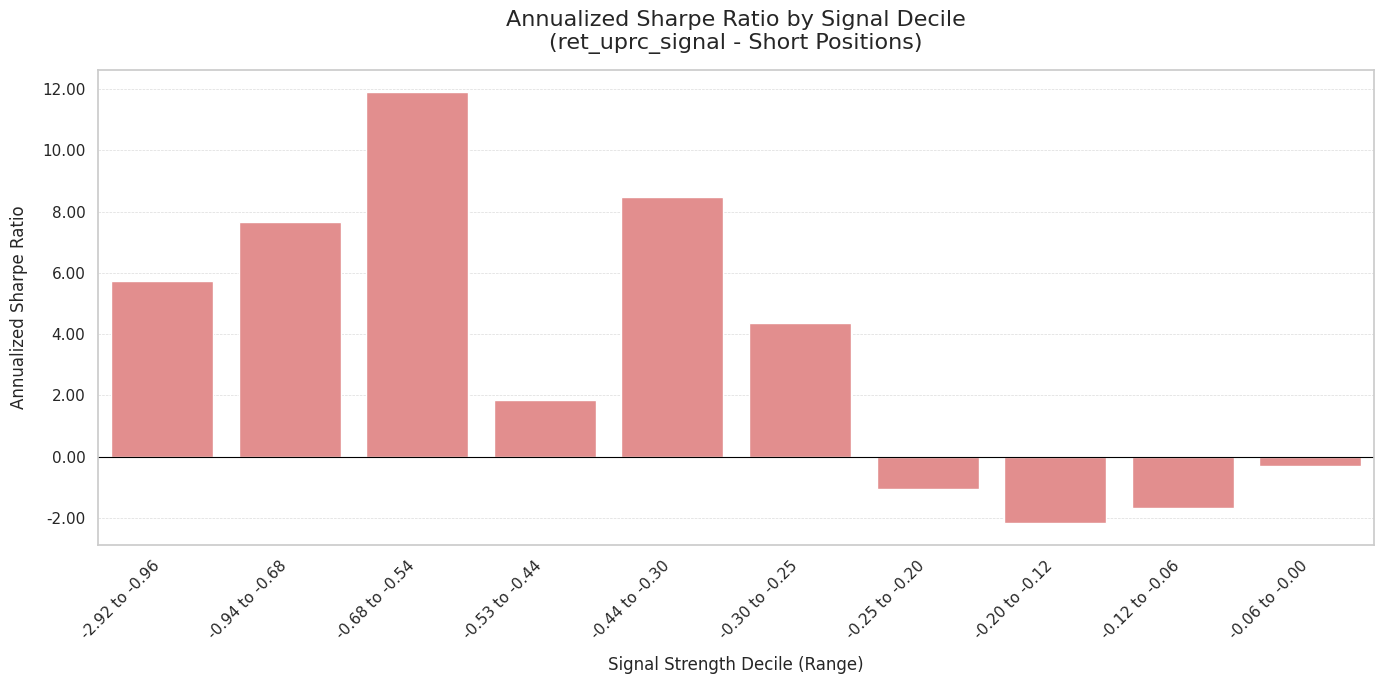

In [16]:
analyzer.plot_signal_decile_sharpe_barchart(df=df, signal_bases=['ret_uprc_signal'])

## Strategy Sharpe by Volatility Environment

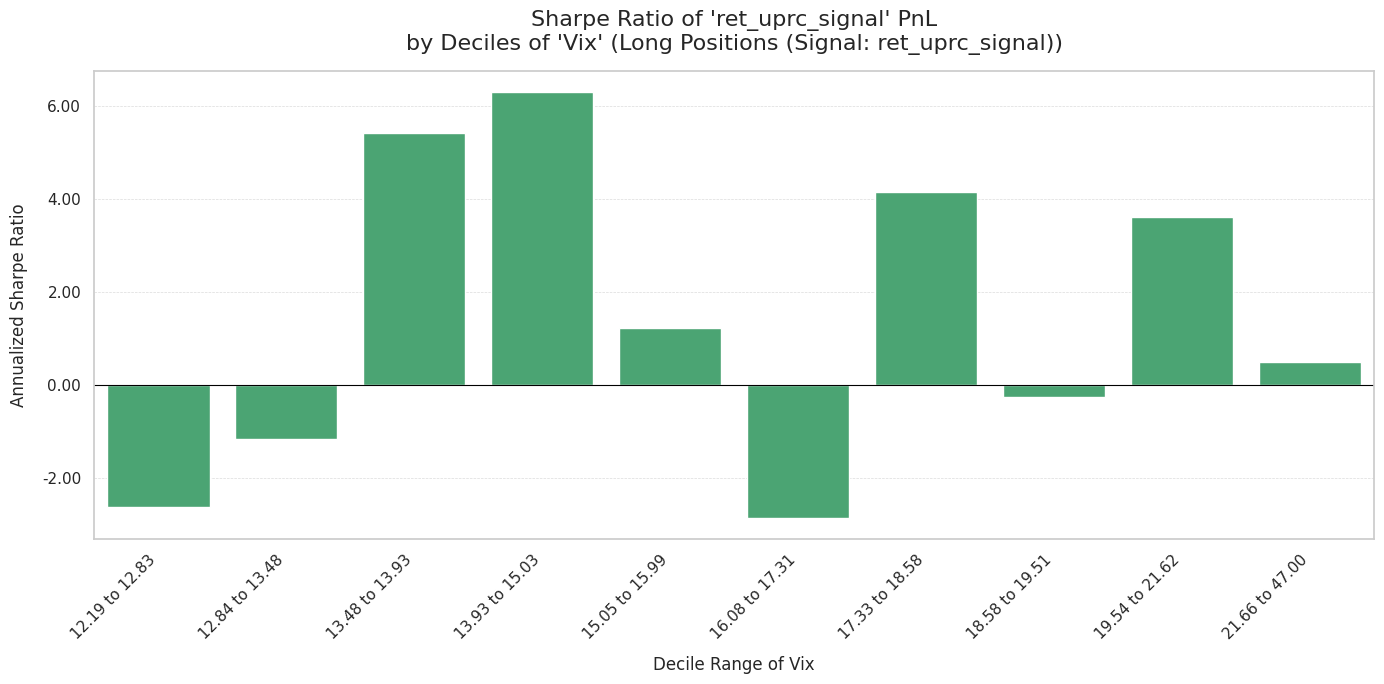

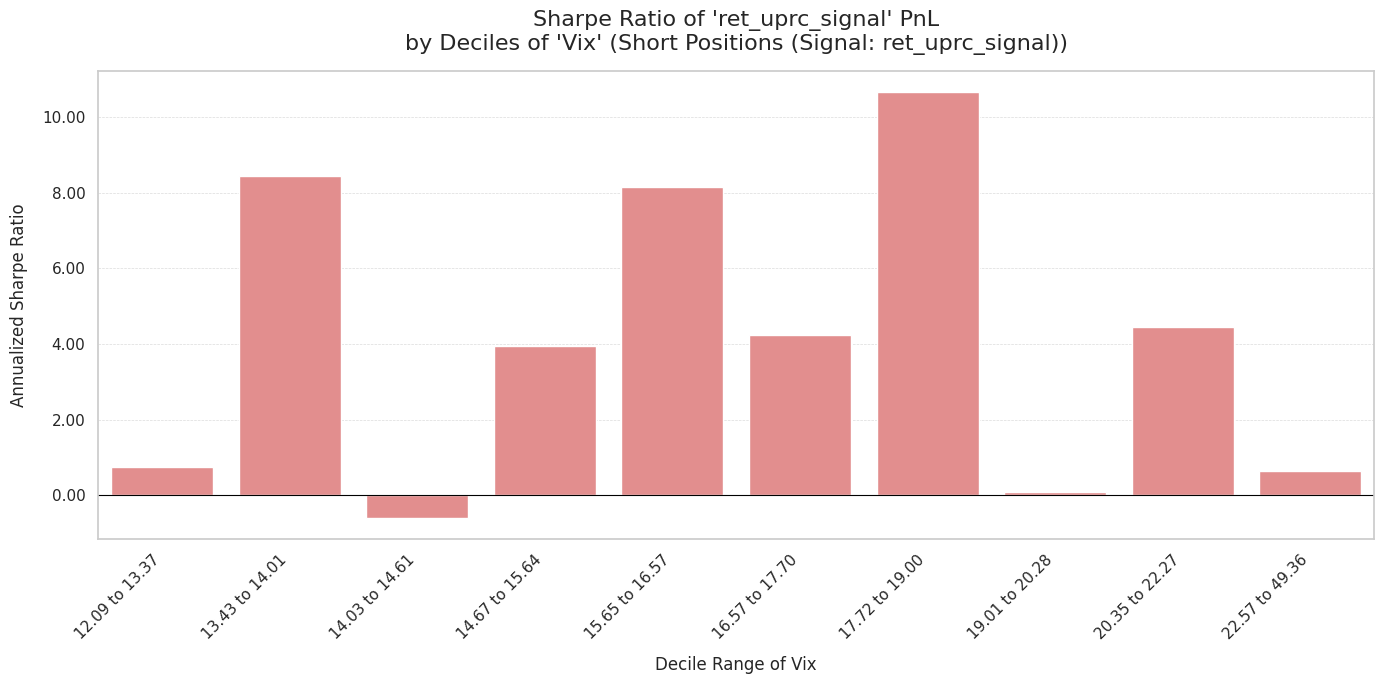

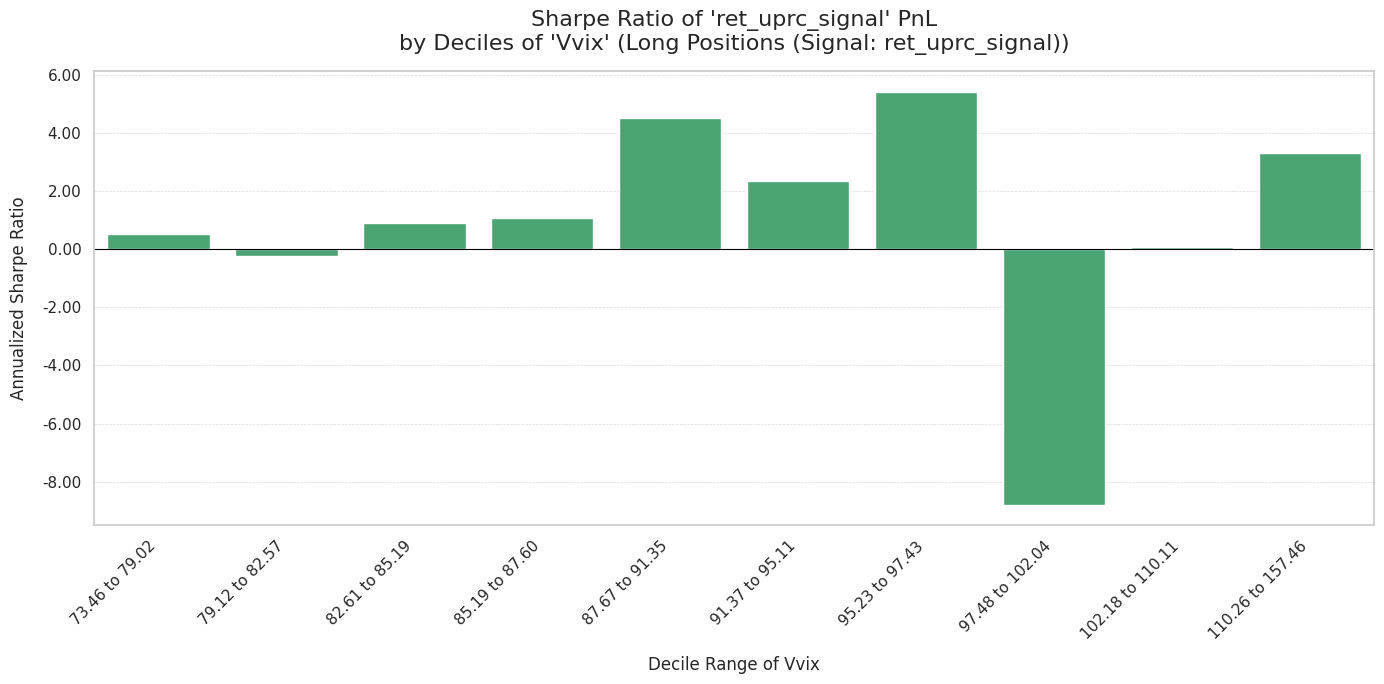

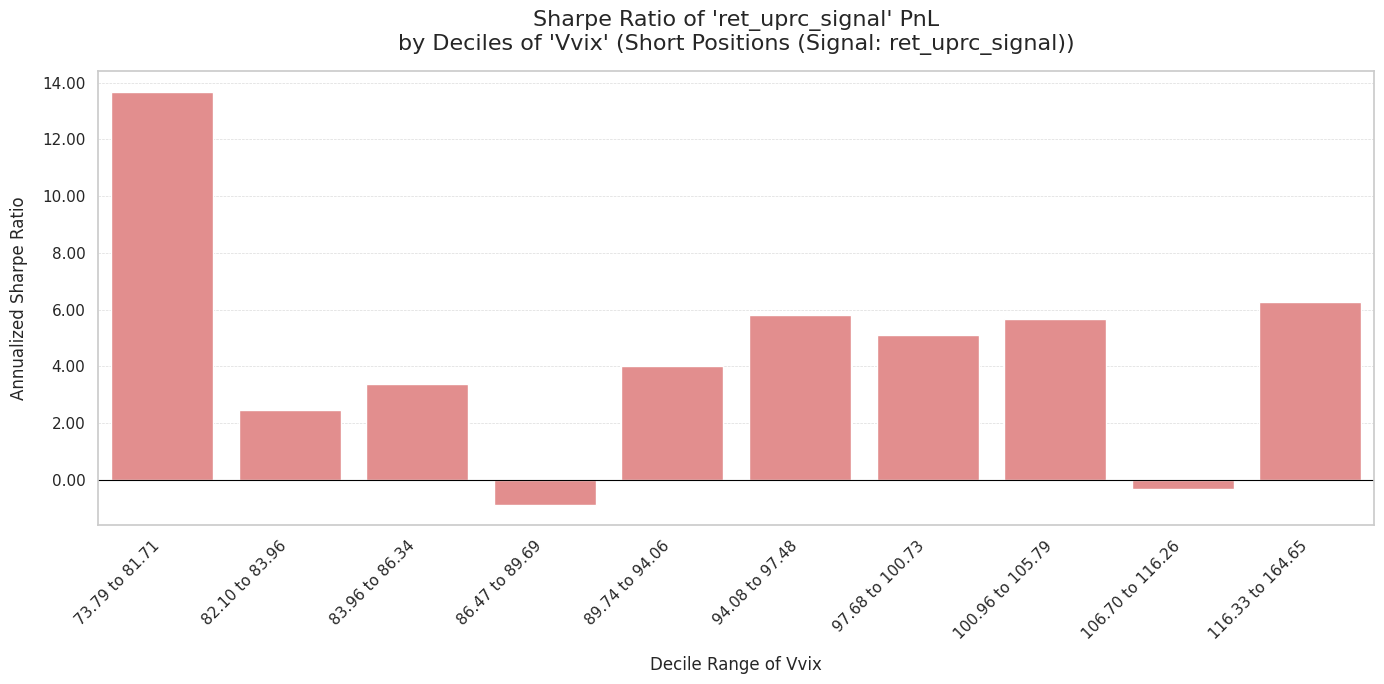

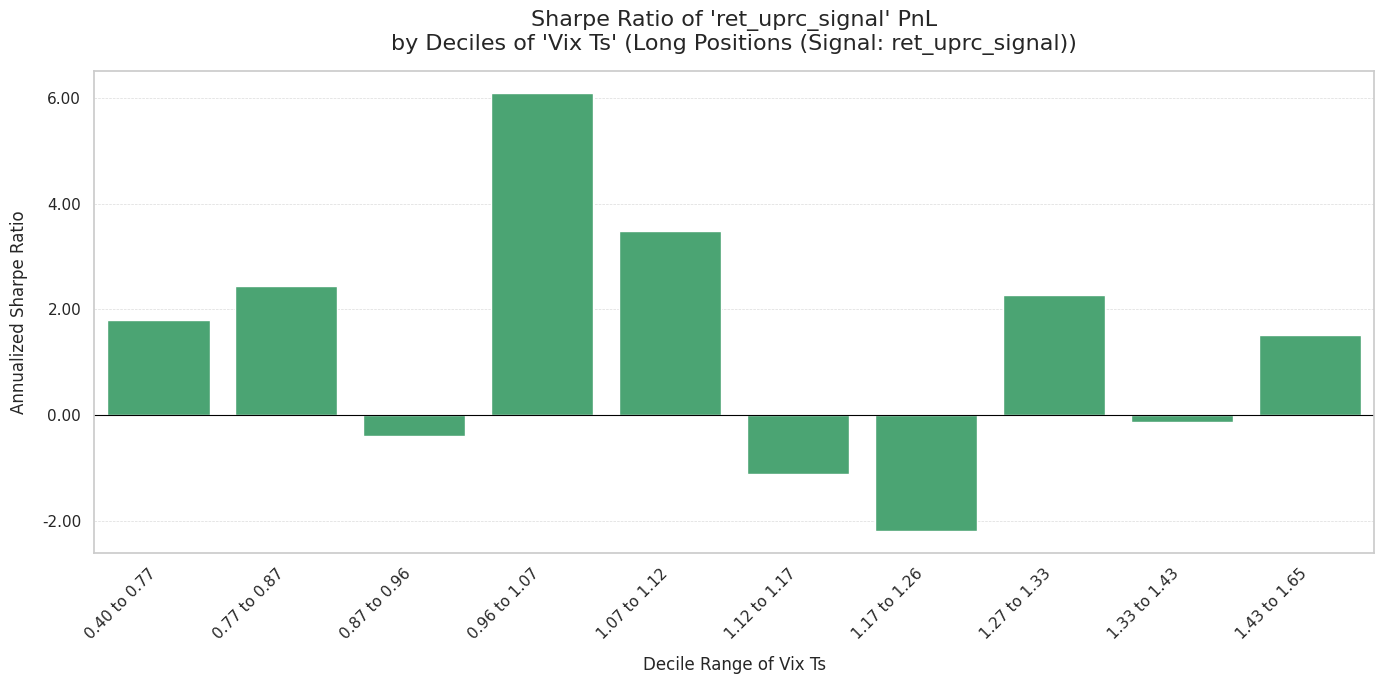

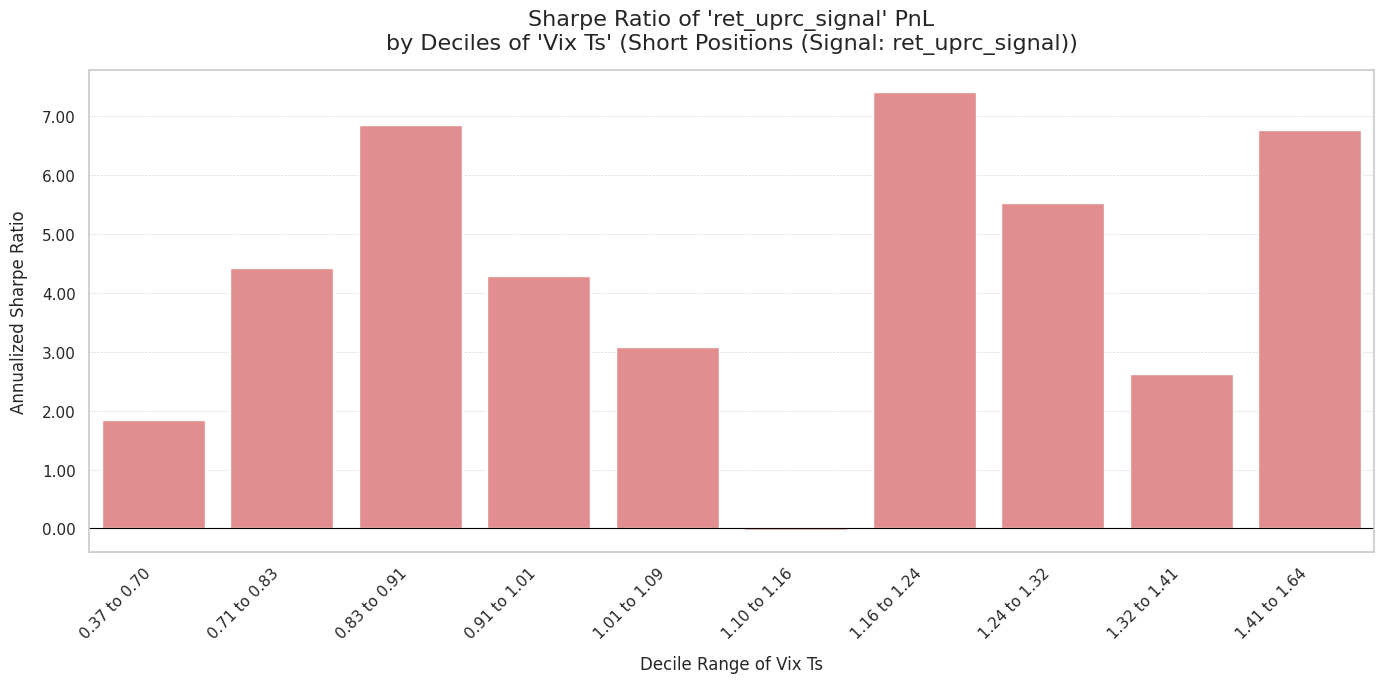

In [17]:
analyzer.plot_column_decile_signal_sharpe_barchart(df=df, columns_to_decile=["VIX", "VVIX", "VIX_TS"], signal_bases=["ret_uprc_signal"])

## Strategy Sharpe by Moving Average of Volatility Environment

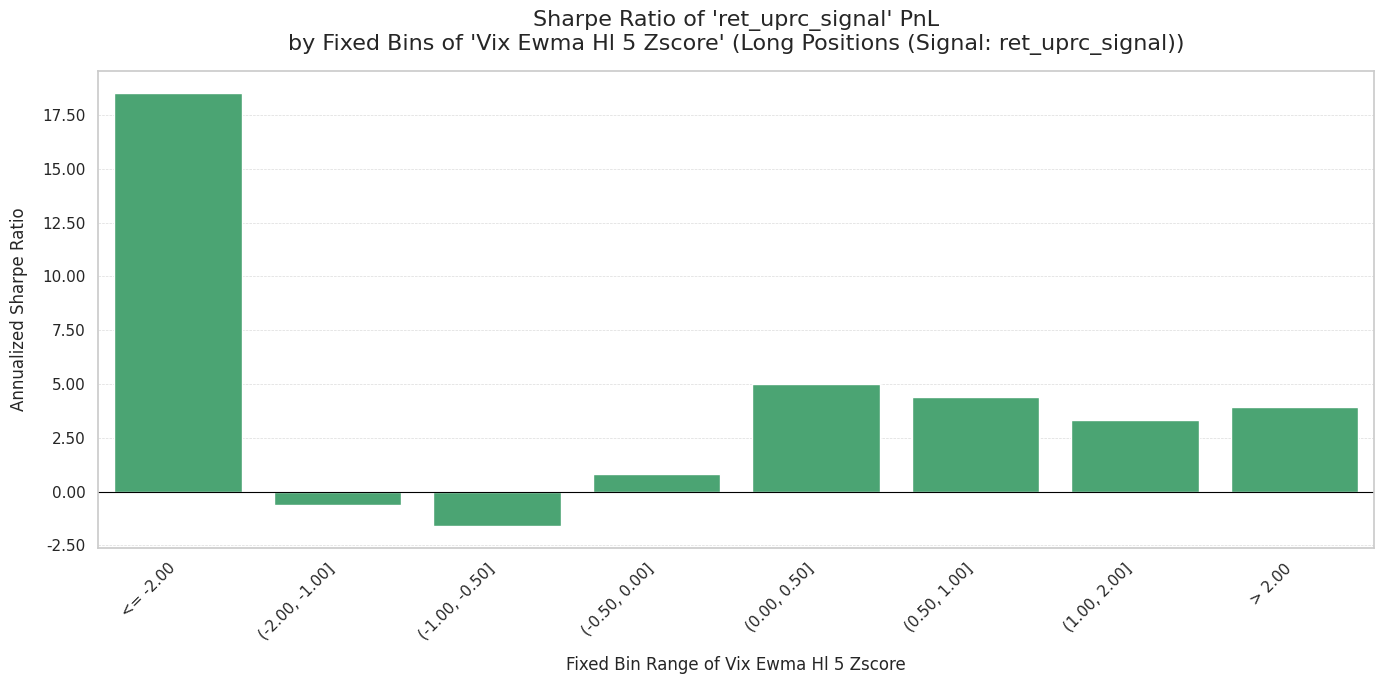

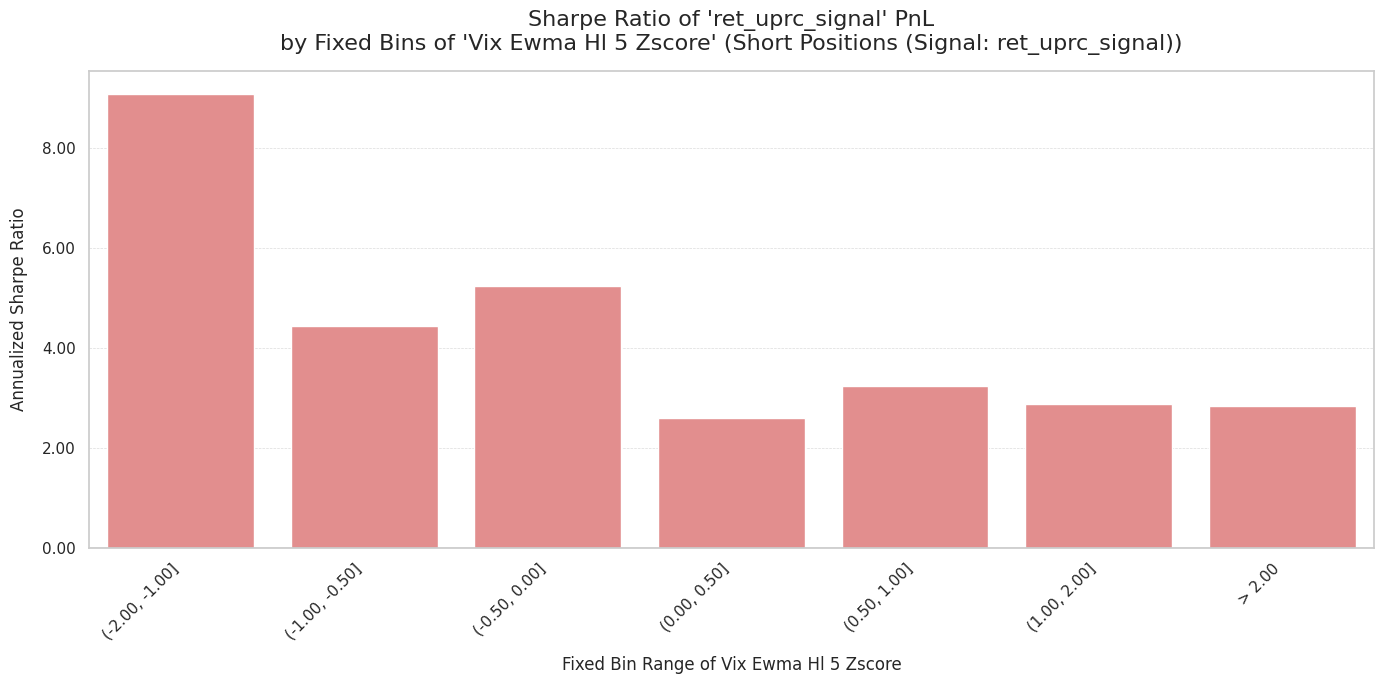

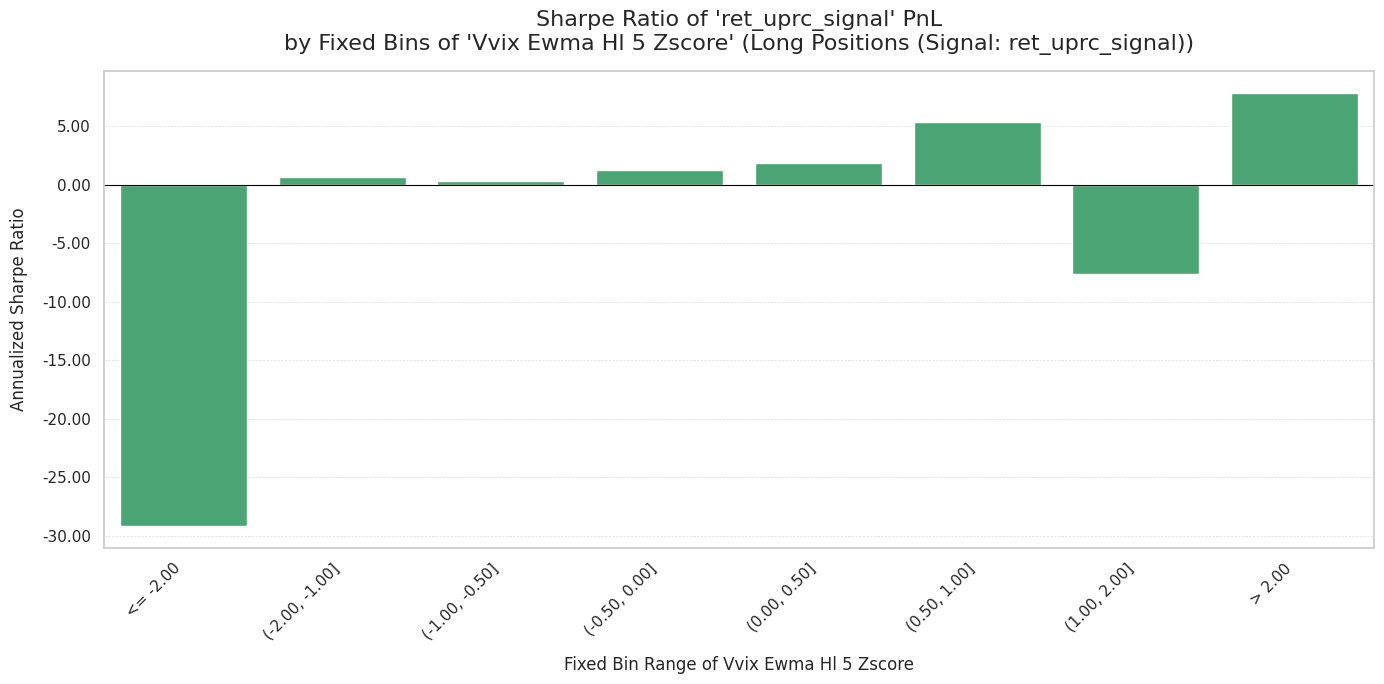

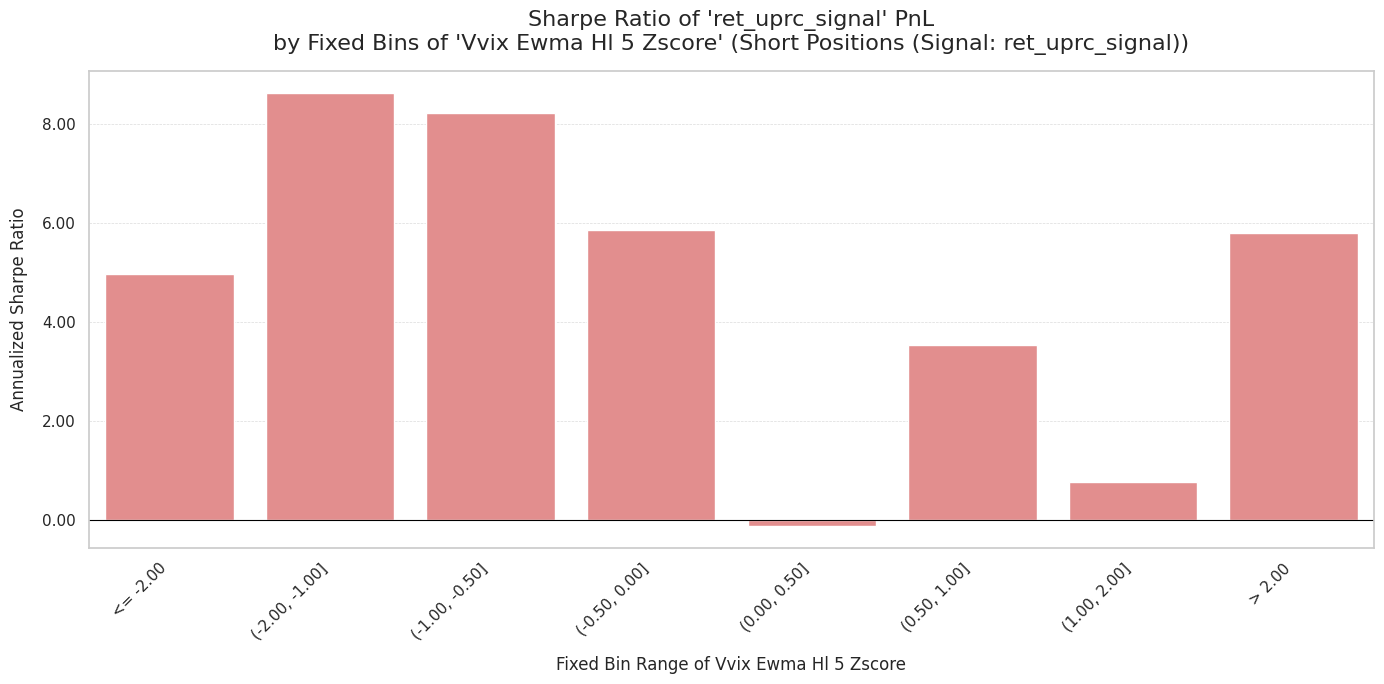

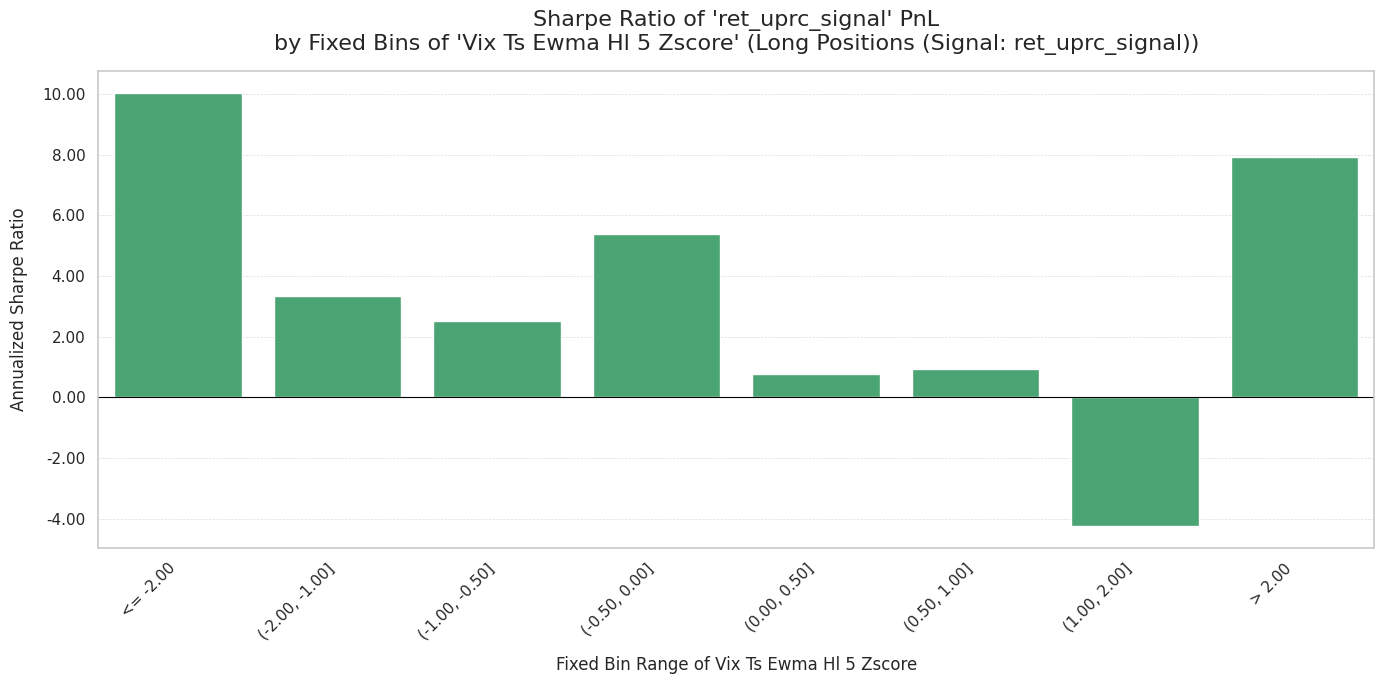

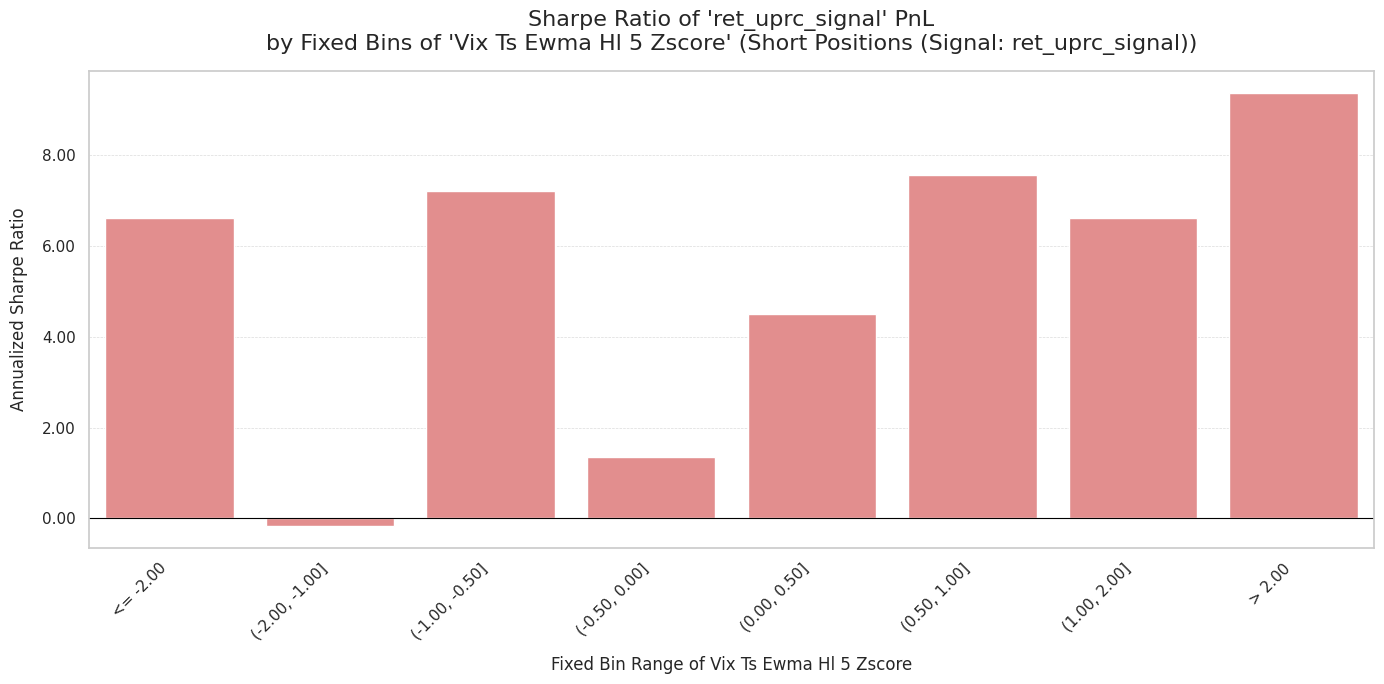

In [18]:
analyzer.plot_column_fixed_bin_signal_sharpe_barchart(df=df, columns_to_bin=["VIX_ewma_hl_5_zscore", "VVIX_ewma_hl_5_zscore", "VIX_TS_ewma_hl_5_zscore"], signal_bases=["ret_uprc_signal"])